In [163]:
import os
import numpy as np
import rasterio
from src import pipeline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import linregress
from datetime import datetime
from scipy import stats
from scipy.ndimage import distance_transform_edt
from datetime import date
import glob
import pandas as pd
import random 
import sigfig
import glob

from src import classification

from src import pixel_regression

from importlib import reload
reload(pixel_regression)

<module 'src.pixel_regression' from 'c:\\Users\\oneil\\Documents\\Uni\\RS\\Project\\wedabaywatch\\src\\pixel_regression.py'>

4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete
4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete


c:\Users\oneil\Documents\Uni\RS\Project\wedabaywatch\src\pixel_regression.py:114: RuntimeWarning: invalid value encountered in subtract
  slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
c:\Users\oneil\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


4% complete
8% complete
12% complete
16% complete


c:\Users\oneil\Documents\Uni\RS\Project\wedabaywatch\src\pixel_regression.py:114: RuntimeWarning: invalid value encountered in multiply
  slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)


20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete
get ------
4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete
4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete
4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% com

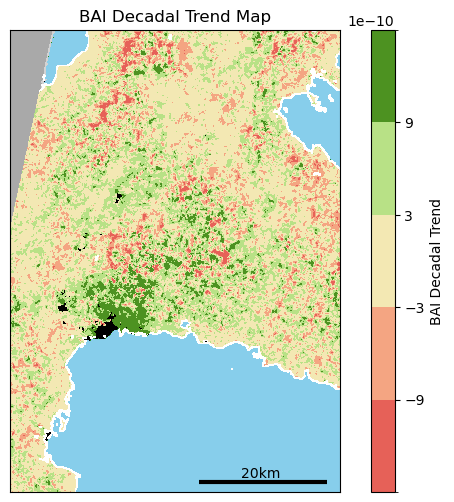

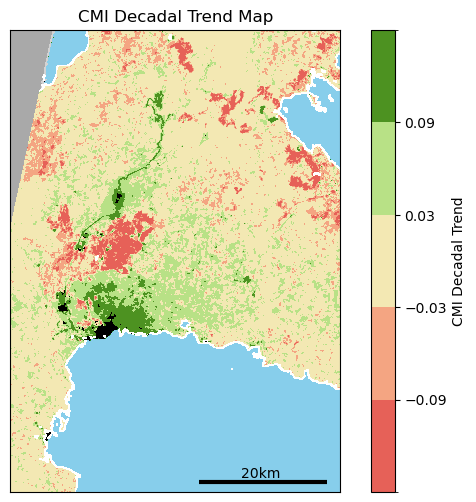

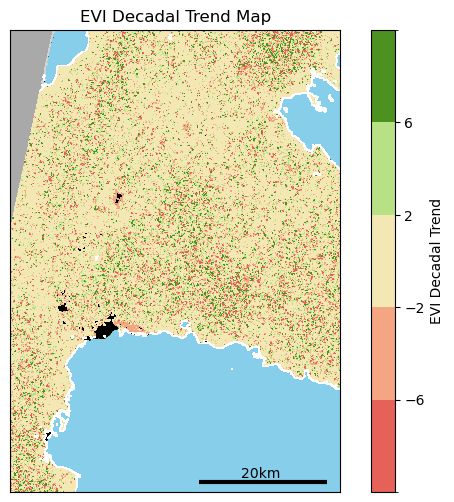

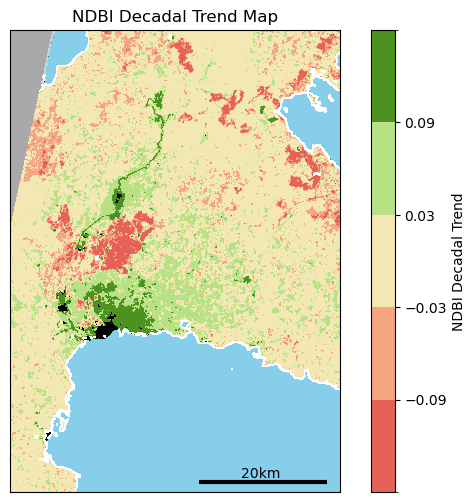

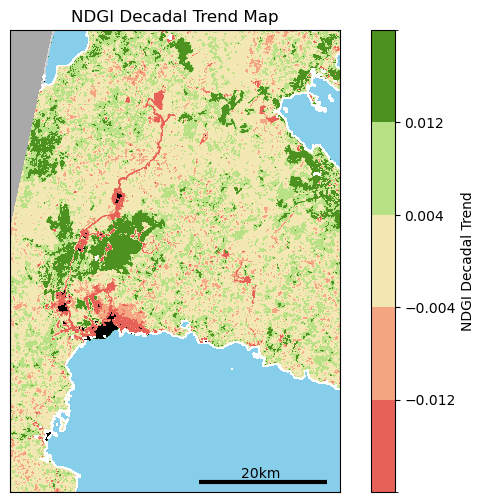

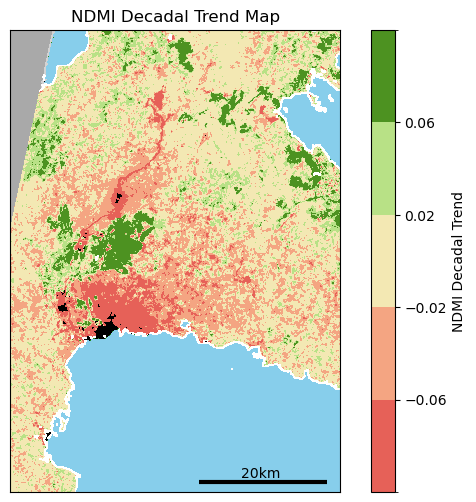

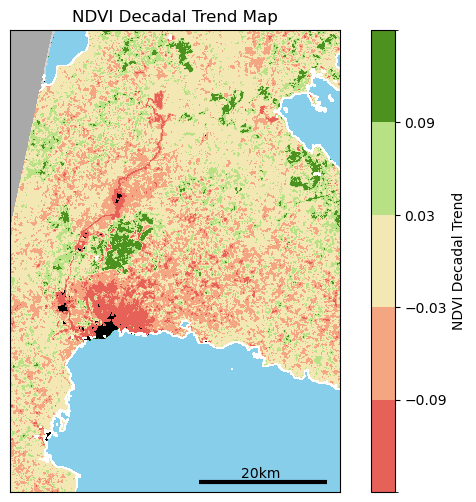

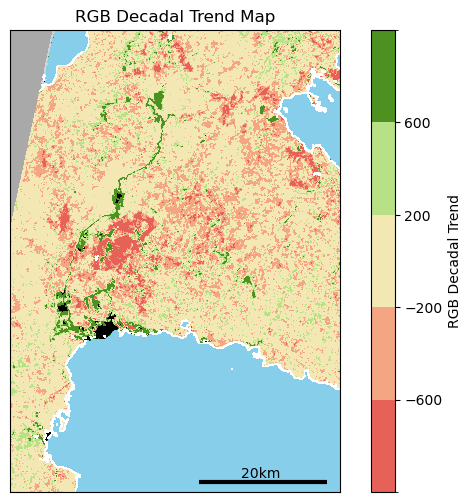

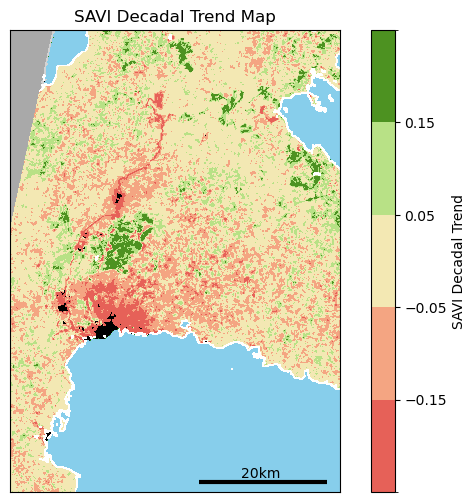

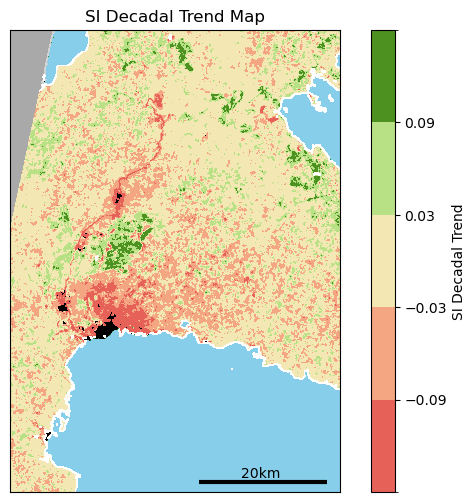

In [312]:
## Roughly 1hr to run

index_filenames = os.listdir("data/derived/LC08_L2SP_109060_20131017_20200912_02_T1/")

np_index_names = np.array([x for x in index_filenames if "." not in x])

for index_name in np_index_names:
    if index_name == "FERRIC_IRON":
        print('get ------')
        continue
    if index_name == "MNDWI": #come back to this to allow water (classes_for_reg not working with water)
        continue
    plot_index_path = "output/plots/pixelreg_" + index_name + ".svg"
    classes_for_reg = [1]
    trend_stack, intercept_stack, dist_plot = pixel_regression.pixel_regression(index_name=index_name, 
                                                                            plot_index_path = plot_index_path,
                                                                            classes_for_reg= [1],
                                                                            index_scaling=10*365)


4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete


c:\Users\oneil\Documents\Uni\RS\Project\wedabaywatch\src\pixel_regression.py:268: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.title('Distance to nearest mine')


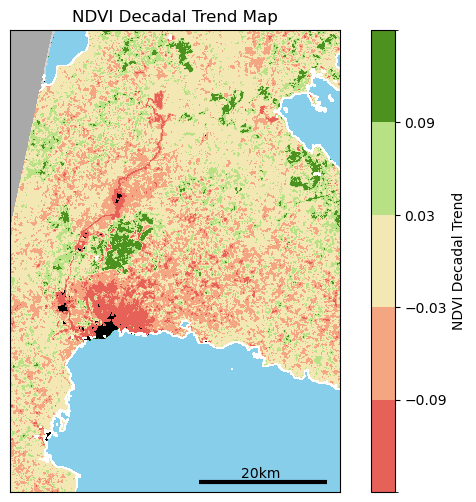

In [310]:
index_name = "NDVI"
#plot_index_path = "output/plots/pixelreg_" + index_name + ".svg"
trend_stack, intercept_stack, dist_plot = pixel_regression.pixel_regression(index_name=index_name, 
                                                                            plot_index_path = None,
                                                                            classes_for_reg= [1],
                                                                            index_scaling=10*365)


In [158]:
final_state, final_state_no_forest = pixel_regression.get_final_state(classes_for_reg = [1])

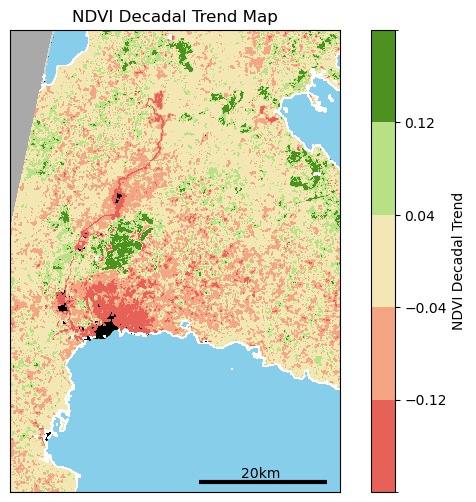

In [311]:
reload(pixel_regression)
pixel_regression.plot_index(
        trend_stack,
        final_state_no_forest,
        index_name,
        )


In [148]:
class_stack, filenames = pixel_regression.get_class_stack()

index_stack = pixel_regression.get_index_stack(class_stack.shape, filenames)

dates_dt, dates_int = pixel_regression.dates_convert(filenames)

### Calculate relationship between NDVI and distance to a mine

In [178]:
final_state_blobbed = classification.clean_small_regions(final_state, min_size= 1000)

final_state_no_cleared = np.where(final_state_blobbed == 2,1, final_state_blobbed)

final_state_blobbed[1700:,] = final_state_no_cleared[1700:,]

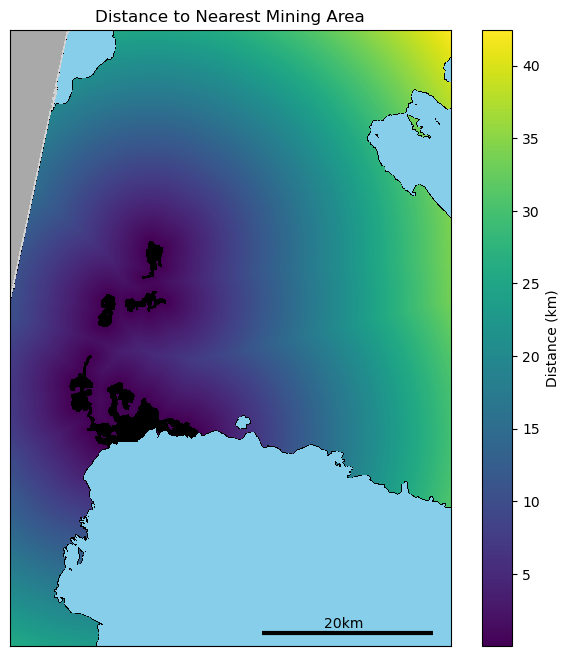

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- Prepare data ---
final_state_ocean_na = np.where(final_state_blobbed == 22, np.nan, final_state_blobbed)

classes = {
    3: ("Cloud", "lightgrey"),
    1: ("Jungle", "black"),
    2: ("Cleared Land", "black"),
    0: ("Ocean", "skyblue"),
    254: ("No data", "darkgrey"),
}

vals, info = zip(*sorted(classes.items()))
names, cols = zip(*info)

class_cmap = mcolors.ListedColormap(cols)
class_norm = mcolors.BoundaryNorm([v - 0.5 for v in vals] + [vals[-1] + 0.5], len(vals))

remaining_class_values = np.unique(final_state_ocean_na)
class_labels = [classes[c][0] for c in remaining_class_values[remaining_class_values >= 0]]

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 8))

# Class image
ax.imshow(final_state_ocean_na, cmap=class_cmap, norm=class_norm)

# Distance overlay
im_dist = ax.imshow(dist_blobbed*30/1000, cmap='viridis')  # pixels -> km
fig.colorbar(im_dist, ax=ax, label='Distance (km)')

ax.set_title('Distance to Nearest Mining Area')
ax.set_xticks([])  # turn off x-axis
ax.set_yticks([])  # turn off y-axis

# Scale bar
pixel_size = 30  # meters per pixel
scalebar_length_m = 20000
scalebar_length_px = scalebar_length_m / pixel_size


# Your custom add_scalebar function (assumes it’s defined somewhere)
pixel_regression.add_scalebar(ax, scalebar_length_px, label = "20km")

plt.savefig('output/plots/distance_heatmap.svg')


### Trend of Trends

Slope: 0.0011560648986295914
Intercept: -0.024915100481049515
R-squared: 0.03637941646191841
P-value: 0.0


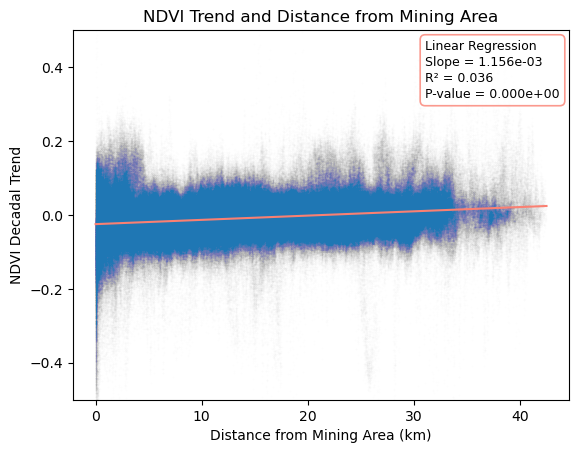

In [309]:
from matplotlib.pyplot import Line2D
from matplotlib.patches import FancyBboxPatch


trend_stack_scaled = trend_stack*365*10


# Flattened arrays
x = dist_blobbed.flatten()*30/1000
y = trend_stack_scaled.flatten()

plt.scatter(x,y, alpha = 1/255,s=1/3)

# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

r_squared = r_value**2

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")

reg_line_max = x.max()

plt.plot([0,reg_line_max],[intercept,intercept+slope*reg_line_max], c = 'salmon', label = "Linear Regression")
# --- Custom legend-style box ---
ax = plt.gca()

# Text content
text = (f"Linear Regression\n"
        f"Slope = {slope:.3e}\n"
        f"R² = {r_squared:.3f}\n"
        f"P-value = {p_value:.3e}")

# Add text first (invisible for sizing)
t = ax.text(0.71, 0.974, text,
            transform=ax.transAxes,
            fontsize=9,
            va='top', ha='left',
            color='black',
            linespacing=1.3,
            bbox=dict(facecolor='white', edgecolor='salmon',
                      boxstyle='round,pad=0.4', lw=1.2, alpha=0.8))



plt.title("NDVI Trend and Distance from Mining Area")
plt.xlabel("Distance from Mining Area (km)")
plt.ylabel("NDVI Decadal Trend")
plt.ylim((-0.5,0.5))
#
plt.savefig("output/plots/distance_trendline.jpg")

In [251]:
class_stack, filenames = pixel_regression.get_class_stack()

index_stack = pixel_regression.get_index_stack(class_stack.shape, filenames)



# Flattened arrays
x = dist_blobbed.flatten()*30/1000
x = np.tile(x, 63)
y = index_stack.flatten()

plt.scatter(x,y, alpha = 1/255,s=1/3)

# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

r_squared = r_value**2

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")
print(f"P-value: {p_value}")

reg_line_max = x.max()

plt.plot([0,reg_line_max],[intercept,intercept+slope*reg_line_max], c = 'salmon', label = "Linear Regression")
# --- Custom legend-style box ---
ax = plt.gca()

# Text content
text = (f"Linear Regression\n"
        f"Slope = {slope:.3e}\n"
        f"R² = {r_squared:.3f}\n"
        f"P-value = {p_value:.3e}")

# Add text first (invisible for sizing)
t = ax.text(0.71, 0.974, text,
            transform=ax.transAxes,
            fontsize=9,
            va='top', ha='left',
            color='black',
            linespacing=1.3,
            bbox=dict(facecolor='white', edgecolor='salmon',
                      boxstyle='round,pad=0.4', lw=1.2, alpha=0.8))



plt.title("NDVI and Distance from Mining Area")
plt.xlabel("Distance from Mining Area (km)")
plt.ylabel("NDVI")
plt.ylim((-0.5,0.5))
#
#plt.savefig("output/plots/distance_trendline_NDVIonly.jpg")

MemoryError: Unable to allocate 3.91 GiB for an array with shape (262124100, 2) and data type float64

Error in callback <function _draw_all_if_interactive at 0x000001C3A7EAF4C0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 3.91 GiB for an array with shape (262124100, 2) and data type float64

MemoryError: Unable to allocate 3.91 GiB for an array with shape (262124100, 2) and data type float64

<Figure size 640x480 with 1 Axes>

### Plot individual paths

4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
33% complete
37% complete
41% complete
45% complete
49% complete
53% complete
58% complete
62% complete
66% complete
70% complete
74% complete
78% complete
82% complete
87% complete
91% complete
95% complete
99% complete


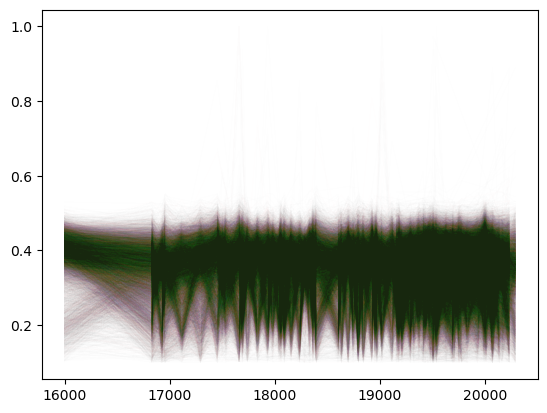

In [23]:
H, W = index_stack.shape[1:]
min_datapoints_for_reg = 5

for y in range(H):
    for x in range(W):
        s = class_stack[:,y,x]
        ndvi_s = index_stack[:,y,x]
        s_filter = ((s == 1) & ~np.isnan(ndvi_s) & (ndvi_s > 0.1))
        if s_filter.sum() < min_datapoints_for_reg:
            continue
        # only print 1% of pixels
        if random.random() > 0.01:
            continue
        plt.plot(dates_int[s_filter],ndvi_s[s_filter], linewidth = 1, alpha = 1/255)
    if y % 100 == 99:
        comp_perc = int(100*y/H)
        print(f"{comp_perc}% complete")

### Explore seasonality

[10,
 2,
 6,
 11,
 5,
 10,
 12,
 5,
 7,
 10,
 2,
 5,
 9,
 12,
 1,
 3,
 1,
 4,
 6,
 10,
 5,
 7,
 10,
 11,
 3,
 5,
 12,
 7,
 10,
 12,
 2,
 5,
 10,
 2,
 7]

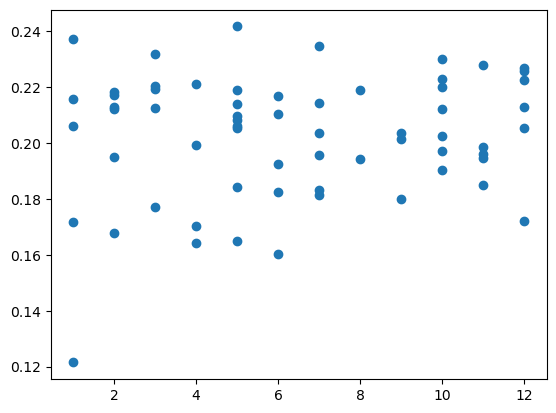

In [149]:

y = np.nanmean(index_stack, axis = (1,2))
x = [dt.month for dt in dates_dt]

plt.scatter(x,y)

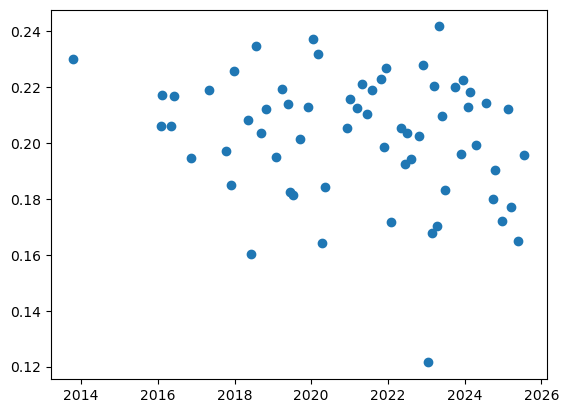

In [150]:
y = np.nanmean(index_stack, axis = (1,2))
x = dates_dt

plt.scatter(x,y)